<a href="https://colab.research.google.com/github/Amaljithuk/Document-Based-Question-Answering-Model/blob/main/mrideepseek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

100%|██████████| 149M/149M [00:03<00:00, 48.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths
dataset_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1"
train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Testing")

# Define class names and labels
class_names = ["glioma", "meningioma", "notumor", "pituitary"]
num_classes = len(class_names)

# Load images and labels
def load_images(folder_path):
    images = []
    labels = []
    for class_name in class_names:
        class_path = os.path.join(folder_path, class_name)
        class_label = class_names.index(class_name)
        for filename in os.listdir(class_path):
            img = cv2.imread(os.path.join(class_path, filename))
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize to 128x128
                images.append(img)
                labels.append(class_label)
    return images, labels

# Load training and testing data
X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)

# Convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (4569, 128, 128, 3)
Validation data shape: (1143, 128, 128, 3)
Testing data shape: (1311, 128, 128, 3)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
    ])
    return model

# Build the model
input_shape = (128, 128, 3)  # Input image shape
model = build_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.5714 - loss: 0.9690 - val_accuracy: 0.8399 - val_loss: 0.4337
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8360 - loss: 0.4520 - val_accuracy: 0.8600 - val_loss: 0.3865
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.8878 - loss: 0.3450 - val_accuracy: 0.9020 - val_loss: 0.2799
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9095 - loss: 0.2504 - val_accuracy: 0.9125 - val_loss: 0.2505
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.9389 - loss: 0.1774 - val_accuracy: 0.9283 - val_loss: 0.2105
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.9490 - loss: 0.1462 - val_accuracy: 0.9221 - val_loss: 0.2056
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9522 - loss: 0.1298 - val_accuracy: 0.9309 - val_loss: 0.2028
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.9606 - loss: 0.1067 - val_accu

In [6]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 286ms/step - accuracy: 0.9057 - loss: 0.3206
Test Loss: 0.22119762003421783
Test Accuracy: 0.9359267950057983


In [7]:
model.save('/content/drive/My Drive/mrimodel.h5')


In [9]:
!ls "/content/drive/My Drive/"


 1081_copy.pdf
 amaljih.docx
'Amaljithuk (1).pptx'
 Amaljithuk.pptx
'Amaljith Valoour.jpg'
 app-release.apk
'Audio from AMALJITH U K'
'Audio from AMALJITH U K (1)'
 BERT-SQuAD
 BERT-SSQuAD
 BERT-SSSQuAD
 Classroom
'Colab Notebooks'
'Completion Certificate _ SkillsBuild (2) (1).pdf'
'Completion Certificate _ SkillsBuild (2).pdf'
'Completion Certificate _ SkillsBuild.pdf'
 congress-wallpapers-1.gdoc
 converted.gdoc
'DBMS LAB SOLUTIONS (File responses)'
'DBMS LAB SOLUTIONS.gform'
 Dbqa
'DCA -Late Mess(06-10-2024 to 22-10-2024).gform'
'DCA -Late Mess(06-10-2024 to 22-10-2024) (Responses).gsheet'
'DCA -MESS BILL JANUARY  (File responses)'
'DCA -MESS BILL JANUARY .gform'
'Dca sanathana.gsheet'
'DDQA MODEL (1).pptx'
'DECEMBER MESS BILL DCA (File responses)'
'DECEMBER MESS BILL DCA.gform'
 DOC-20230712-WA0049..gdoc
'Document from AMALJITH U K (1).pdf'
'Document from AMALJITH U K (2).pdf'
'Document from AMALJITH U K.pdf'
'E-football Tournament  (File responses)'
'E-football Tournament .gform'
'

In [ ]:
model.save("brain_tumor_classification_model.h5")

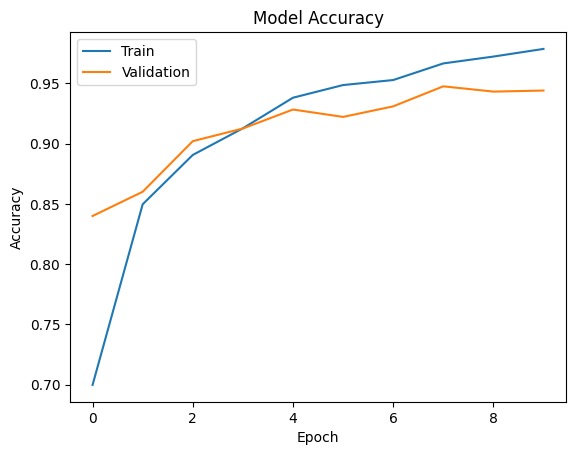

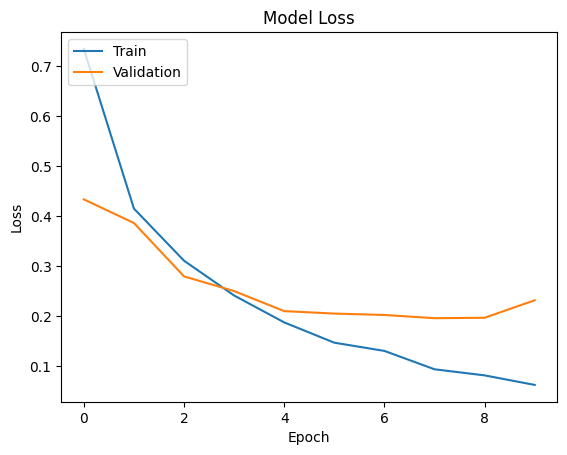

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Load a sample image
sample_image = cv2.imread("/content/images (1).jpeg")
sample_image = cv2.resize(sample_image, (128, 128))
sample_image = np.expand_dims(sample_image, axis=0) / 255.0

# Predict
prediction = model.predict(sample_image)
print("Prediction:", prediction)

# Interpret prediction
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [10]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [12]:
import streamlit as st
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("/content/drive/My Drive/mrimodel.h5")

# Define class names
class_names = ["glioma", "meningioma", "notumor", "pituitary"]

# Streamlit app
st.title("Brain Tumor Classification using MRI Scans")
st.write("Upload an MRI scan to classify the type of tumor.")

# Upload image
uploaded_file = st.file_uploader("Choose an MRI scan...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Read and preprocess the image
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, 1)
    image = cv2.resize(image, (128, 128))  # Resize to match model input size
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(image)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Display results
    st.image(image[0], caption="Uploaded MRI Scan", use_column_width=True)
    st.write(f"**Prediction:** {predicted_class}")
    st.write(f"**Confidence:** {confidence:.2f}%")

2025-02-19 13:34:14.875 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 13:34:14.991 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-19 13:34:14.993 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 13:34:14.995 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 13:34:14.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 13:34:14.997 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 13:34:14.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 13:34:14.999 Thread 'MainThread': mi

In [14]:
!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.69.165.5:8501

  Stopping...
^C


In [ ]:
!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py


In [ ]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
